# Bach Chorales Harmony

Учитывая музыкальный поток, задача анализа гармонии музыки состоит в том, чтобы связать метку аккорда с каждой точкой времени. Такие ярлыки показывают основную гармонию, указывая фундаментальную ноту (корень) и режим, используя имена аккордов, такие как C minor.

Набор данных состоит из 60 хоралов (5665 событий) J.S. Бах (1675-1750). Каждое событие каждого хорала помечено, используя 1 из 101 аккордовых меток.
Количество атрибутов: 17 (имя последовательности, номер события, наличие метки (x12), аккорд).

Информация о высотных классах была извлечена из загруженных источников MIDI от (JSB Chorales) [http://www.jsbchorales.net]. Информация о метре были рассчитаны через программу Meter, которая является частью Melisma музыкальный анализатор (Melisma) [http://www.link.cs.cmu.edu/music-analysis/]. Рукописные ярлыки вручную аннотируются экспертом-человеком.

## Описание данных

   * ***Choral ID***: соответствует именам файлов из (Bach Central) [http://www.bachcentral.com];
   * ***Event number***:  индекс (начиная с 1) события внутри хорала;
   * ***Pitch classes(C..B) (x12)***: YES / NO в зависимости от того, присутствует ли данный высотный класс [https://ru.wikipedia.org/wiki/Высотный_класс];
   * ***Pitch class Bass***: высотный класс басовой ноты;
   * ***Meter***: целые числа от 1 до 5, меньшие числа обозначают менее акцентированные события, более высокие числа обозначают более акцентированные события;
   * ***Chord label***: аккорд, резонирующий во время данного события.

Подключаем используемые в работе библиотеки

In [273]:
import numpy  as np
import matplotlib.pyplot  as plt
import pandas as pd
%matplotlib inline

Считываем данные из датасета

In [274]:
data = pd.read_csv('source/jsbach_chorals_harmony.data', sep = ',', engine = 'python')

Определение типа данных

In [275]:
type(data)

pandas.core.frame.DataFrame

Выводим часть данных в виде таблице для визуального контроля

In [276]:
data

,Choral ID,Event number,Pitch class C,Pitch class C#,Pitch class D,Pitch class D#,Pitch class E,Pitch class F,Pitch class F#,Pitch class G,Pitch class G#,Pitch class A,Pitch class A#,Pitch class B,Pitch class Bass,Meter,Chord label
0,000106b_,1,YES,NO,NO,NO,NO,YES,NO,NO,NO,YES,NO,NO,F,3,F_M
1,000106b_,2,YES,NO,NO,NO,YES,NO,NO,YES,NO,NO,NO,NO,E,5,C_M
2,000106b_,3,YES,NO,NO,NO,YES,NO,NO,YES,NO,NO,NO,NO,E,2,C_M
3,000106b_,4,YES,NO,NO,NO,NO,YES,NO,NO,NO,YES,NO,NO,F,3,F_M
4,000106b_,5,YES,NO,NO,NO,NO,YES,NO,NO,NO,YES,NO,NO,F,2,F_M
5,000106b_,6,NO,NO,YES,NO,NO,YES,NO,NO,NO,YES,NO,NO,D,4,D_m
6,000106b_,7,NO,NO,YES,NO,NO,YES,NO,NO,NO,YES,NO,NO,D,2,D_m
7,000106b_,8,YES,NO,NO,NO,NO,YES,NO,NO,NO,YES,NO,NO,A,3,F_M
8,000106b_,9,YES,NO,NO,NO,NO,YES,NO,NO,NO,YES,NO,NO,A,2,F_M
9,000106b_,10,NO,NO,YES,NO,NO,YES,NO,NO,NO,NO,YES,NO,Bb,5,BbM


Пробник от таблицы выше, верхушка

In [277]:
data.head()

,Choral ID,Event number,Pitch class C,Pitch class C#,Pitch class D,Pitch class D#,Pitch class E,Pitch class F,Pitch class F#,Pitch class G,Pitch class G#,Pitch class A,Pitch class A#,Pitch class B,Pitch class Bass,Meter,Chord label
0,000106b_,1,YES,NO,NO,NO,NO,YES,NO,NO,NO,YES,NO,NO,F,3,F_M
1,000106b_,2,YES,NO,NO,NO,YES,NO,NO,YES,NO,NO,NO,NO,E,5,C_M
2,000106b_,3,YES,NO,NO,NO,YES,NO,NO,YES,NO,NO,NO,NO,E,2,C_M
3,000106b_,4,YES,NO,NO,NO,NO,YES,NO,NO,NO,YES,NO,NO,F,3,F_M
4,000106b_,5,YES,NO,NO,NO,NO,YES,NO,NO,NO,YES,NO,NO,F,2,F_M


Пробник от таблицы выше, низушка

In [278]:
data.tail()

,Choral ID,Event number,Pitch class C,Pitch class C#,Pitch class D,Pitch class D#,Pitch class E,Pitch class F,Pitch class F#,Pitch class G,Pitch class G#,Pitch class A,Pitch class A#,Pitch class B,Pitch class Bass,Meter,Chord label
5660,015505b_,105,NO,NO,YES,NO,NO,NO,NO,YES,NO,NO,YES,NO,G,4,G_m
5661,015505b_,106,NO,NO,YES,NO,NO,NO,NO,YES,NO,YES,NO,NO,G,3,G_m
5662,015505b_,107,YES,NO,NO,NO,YES,NO,NO,YES,NO,NO,NO,NO,C,5,C_M
5663,015505b_,108,YES,NO,NO,NO,YES,NO,NO,YES,NO,NO,YES,NO,C,3,C_M
5664,015505b_,109,NO,NO,NO,NO,NO,YES,NO,NO,NO,YES,NO,NO,F,4,F_M


Контроль размеров таблицы и наименования признаков(столбцов)

In [279]:
print(data.shape)
print(data.columns)

(5665, 17)
Index(['Choral ID', 'Event number', 'Pitch class C', 'Pitch class C#',
       'Pitch class D', 'Pitch class D#', 'Pitch class E', 'Pitch class F',
       'Pitch class F#', 'Pitch class G', 'Pitch class G#', 'Pitch class A',
       'Pitch class A#', 'Pitch class B', 'Pitch class Bass', 'Meter',
       'Chord label'],
      dtype='object')


Индексация данных

In [280]:
data.index

RangeIndex(start=0, stop=5665, step=1)

Проверяем элемент таблицы

In [281]:
data.at[2, 'Pitch class G']

'YES'

Проверяем весь столбец

In [282]:
data['Event number']

0         1
1         2
2         3
3         4
4         5
5         6
6         7
7         8
8         9
9        10
10       11
11       12
12       13
13       14
14       15
15       16
16       17
17       18
18       19
19       20
20       21
21       22
22       23
23       24
24       25
25       26
26       27
27       28
28       29
29       30
       ... 
5635     80
5636     81
5637     82
5638     83
5639     84
5640     85
5641     86
5642     87
5643     88
5644     89
5645     90
5646     91
5647     92
5648     93
5649     94
5650     95
5651     96
5652     97
5653     98
5654     99
5655    100
5656    101
5657    102
5658    103
5659    104
5660    105
5661    106
5662    107
5663    108
5664    109
Name: Event number, Length: 5665, dtype: int64

Проверяем элемент из столбца

In [283]:
data['Event number'][3]

4

Проверяем тип данных в столбце

In [284]:
data['Event number'].dtype.name

'int64'

Проверяем тип данных в столбце

In [285]:
data['Pitch class C'].dtype.name

'object'

Проверяем тип данных конкретного элемента

In [286]:
type(data['Pitch class C'][3])

str

Тип данных столбца

In [287]:
type(data['Pitch class C'])

pandas.core.series.Series

Заголовок таблицы по нескольким выбранным столбцам

In [288]:
data[['Choral ID', 'Chord label']].head()

,Choral ID,Chord label
0,000106b_,F_M
1,000106b_,C_M
2,000106b_,C_M
3,000106b_,F_M
4,000106b_,F_M


Основные сведения о числовых признаках

In [289]:
data.describe()

,Event number,Meter
count,5665.000000,5665.000000
mean,53.374404,3.134863
std,37.268208,1.109710
min,1.000000,1.000000
25%,24.000000,2.000000
50%,48.000000,3.000000
75%,75.000000,4.000000
max,207.000000,5.000000


Построим числовые зависимости всего от всего

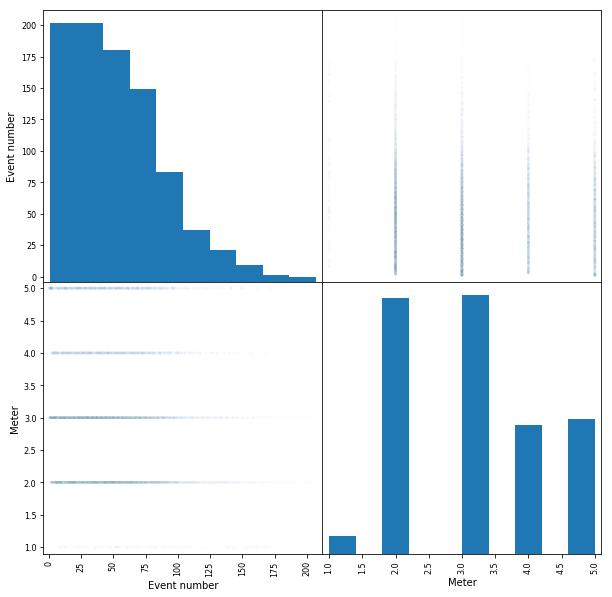

In [290]:
from pandas.plotting import scatter_matrix
scatter_matrix(data, alpha = .01, figsize = (10, 10))
pass

Корреляция

In [291]:
data.corr()

,Event number,Meter
Event number,1.000000,-0.076262
Meter,-0.076262,1.000000


Одна из числовых зависимостей с настраиваемыми параметрами графики 

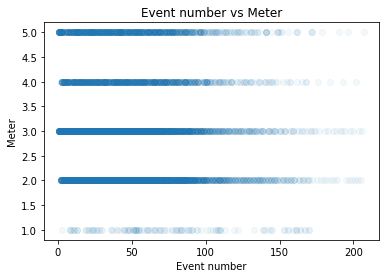

In [292]:
plt.plot(data['Event number'], data['Meter'], 'o', alpha = 0.05)
plt.xlabel('Event number')
plt.ylabel('Meter')
plt.title('Event number vs Meter')
pass

Принадлежность элементов определённому классу признака

In [293]:
data['Pitch class F#'] == 'YES'

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
        ...  
5635    False
5636    False
5637    False
5638    False
5639    False
5640    False
5641    False
5642    False
5643    False
5644    False
5645    False
5646     True
5647    False
5648    False
5649     True
5650    False
5651    False
5652    False
5653    False
5654    False
5655    False
5656    False
5657    False
5658    False
5659    False
5660    False
5661    False
5662    False
5663    False
5664    False
Name: Pitch class F#, Length: 5665, dtype: bool

Диаграмма распределения бинарного признака в зависимости от двух числовых

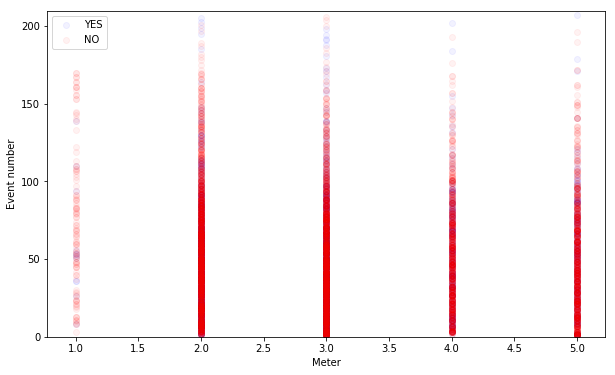

In [294]:
plt.figure(figsize = (10, 6))

plt.scatter(data[data['Pitch class F#'] == 'YES']['Meter'],
            data[data['Pitch class F#'] == 'YES']['Event number'],
            alpha = 0.05,
            label = 'YES',
            color = 'b')

plt.scatter(data[data['Pitch class F#'] != 'YES']['Meter'],
            data[data['Pitch class F#'] != 'YES']['Event number'],
            alpha = 0.05,
            label = 'NO',
            color = 'r')

plt.xlabel('Meter')

plt.ylabel('Event number')
plt.yticks(np.arange(0, 210, step=50))
plt.ylim(0, 210)
plt.legend()
#plt.grid()

То же, но со случайным разбросом одного из признаков, "размытие" зависимости

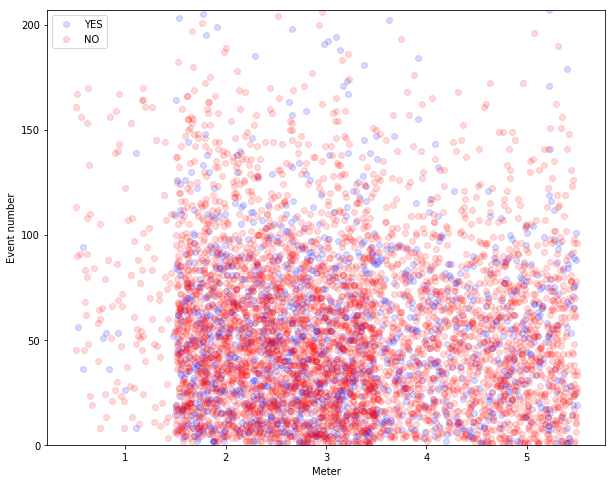

In [295]:
np.random.seed(0)
education_num_rnd = data['Meter'] + np.random.rand(data.shape[0]) - .5

plt.figure(figsize = (10, 8))

plt.scatter(education_num_rnd[data['Pitch class F#'] == 'YES'],
            data[data['Pitch class F#'] == 'YES']['Event number'],
            alpha = 0.15,
            label = 'YES',
            color = 'b')

plt.scatter(education_num_rnd[data['Pitch class F#'] != 'YES'],
            data[data['Pitch class F#'] != 'YES']['Event number'],
            alpha = 0.15,
            label = 'NO',
            color = 'r')

plt.xlabel('Meter')

plt.ylabel('Event number')
plt.yticks(np.arange(0, 207, step=50))
plt.ylim(0, 207)
plt.legend()
#plt.grid()
#plt.title('ъ')


Основные сведения по данным, из таблицы видно, что пропусков в данных нет, уже хорошо, большинство признаков бинарные.

In [296]:
data.describe(include = ['object'])

,Choral ID,Pitch class C,Pitch class C#,Pitch class D,Pitch class D#,Pitch class E,Pitch class F,Pitch class F#,Pitch class G,Pitch class G#,Pitch class A,Pitch class A#,Pitch class B,Pitch class Bass,Chord label
count,5665,5665,5665,5665,5665,5665,5665,5665,5665,5665,5665,5665,5665,5665,5665
unique,62,2,2,2,2,2,2,2,2,2,2,2,2,16,102
top,002908ch,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,D,D_M
freq,206,3875,4711,3300,4956,3540,4381,4253,3523,5006,3290,4644,3874,689,503


Слияние двух таблиц выше, максимальная полнота сведений о данных

In [297]:
data.describe(include = 'all')

,Choral ID,Event number,Pitch class C,Pitch class C#,Pitch class D,Pitch class D#,Pitch class E,Pitch class F,Pitch class F#,Pitch class G,Pitch class G#,Pitch class A,Pitch class A#,Pitch class B,Pitch class Bass,Meter,Chord label
count,5665,5665.000000,5665,5665,5665,5665,5665,5665,5665,5665,5665,5665,5665,5665,5665,5665.000000,5665
unique,62,NaN,2,2,2,2,2,2,2,2,2,2,2,2,16,NaN,102
top,002908ch,NaN,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,D,NaN,D_M
freq,206,NaN,3875,4711,3300,4956,3540,4381,4253,3523,5006,3290,4644,3874,689,NaN,503
mean,NaN,53.374404,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.134863,NaN
std,NaN,37.268208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.109710,NaN
min,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN
25%,NaN,24.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,NaN
50%,NaN,48.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,NaN
75%,NaN,75.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,NaN


Классы в бинарном признаке

In [298]:
data['Pitch class F#'].unique()

array([' NO', 'YES'], dtype=object)

Классы в категориальном признаке.

In [299]:
data['Pitch class Bass'].unique()

array(['F', 'E', 'D', 'A', 'Bb', 'C', 'G', 'B', 'F#', 'C#', 'Eb', 'D#',
       'G#', 'A#', 'Ab', 'Db'], dtype=object)

## Подготовка данных

   Выбросим признак Choral ID, поскольку от названия произведения мало что зависит, также мало что зависит от порядкового номера события, значит Event Number выбрасываем туда-же. 
   Задача состоит в предсказании резонирующего в данный момент аккорда по встречающимся или не встречающимся высотным классам основного исполнения и баса. Большинство признаков бинарных, остаётся только придумать, что делать с категориальным признаком Pitch Class Bass, например векторизовать его.

In [300]:
data = data.drop('Choral ID', axis=1)
data = data.drop('Event number', axis=1)

Поскольку столбец Chord label содержит ответ, уберём из таблицы и его

In [301]:
y = data['Chord label']
data = data.drop('Chord label', axis=1)

In [302]:
data.head()

,Pitch class C,Pitch class C#,Pitch class D,Pitch class D#,Pitch class E,Pitch class F,Pitch class F#,Pitch class G,Pitch class G#,Pitch class A,Pitch class A#,Pitch class B,Pitch class Bass,Meter
0,YES,NO,NO,NO,NO,YES,NO,NO,NO,YES,NO,NO,F,3
1,YES,NO,NO,NO,YES,NO,NO,YES,NO,NO,NO,NO,E,5
2,YES,NO,NO,NO,YES,NO,NO,YES,NO,NO,NO,NO,E,2
3,YES,NO,NO,NO,NO,YES,NO,NO,NO,YES,NO,NO,F,3
4,YES,NO,NO,NO,NO,YES,NO,NO,NO,YES,NO,NO,F,2


In [303]:
data['Pitch class Bass'].unique()

array(['F', 'E', 'D', 'A', 'Bb', 'C', 'G', 'B', 'F#', 'C#', 'Eb', 'D#',
       'G#', 'A#', 'Ab', 'Db'], dtype=object)

Имеются повторяющиеся с точки зрения музыки, но разные по названию ноты (классы), приведём их к стандарту как в заголовке таблицы для основного звучания(C, C# = Db, D, D# = Eb, E, F, F#, G, G# = Ab, A, A# = Bb, B).

In [304]:
d = {'Bb' : 'A#', 'Db' : 'C#', 'Eb': 'D#', 'Ab' : 'G#'}
data = data.replace({'Pitch class Bass': d})
#data

Разобьём таблицу на части по типу признака

In [305]:
categorical_columns = [c for c in data.columns if data[c].dtype.name == 'object']
numerical_columns   = [c for c in data.columns if data[c].dtype.name != 'object']
print(categorical_columns)
print(numerical_columns)

['Pitch class C', 'Pitch class C#', 'Pitch class D', 'Pitch class D#', 'Pitch class E', 'Pitch class F', 'Pitch class F#', 'Pitch class G', 'Pitch class G#', 'Pitch class A', 'Pitch class A#', 'Pitch class B', 'Pitch class Bass']
['Meter']


In [306]:
data_describe = data.describe(include = [object])
binary_columns    = [c for c in categorical_columns if data_describe[c]['unique'] == 2]
nonbinary_columns = [c for c in categorical_columns if data_describe[c]['unique'] > 2]
print(binary_columns, nonbinary_columns)

['Pitch class C', 'Pitch class C#', 'Pitch class D', 'Pitch class D#', 'Pitch class E', 'Pitch class F', 'Pitch class F#', 'Pitch class G', 'Pitch class G#', 'Pitch class A', 'Pitch class A#', 'Pitch class B'] ['Pitch class Bass']


Бинарный признак делаем с циферками

In [307]:
data.at[data['Pitch class C'] != 'YES', 'Pitch class C'] = 0
data.at[data['Pitch class C'] == 'YES', 'Pitch class C'] = 1
data.at[data['Pitch class C#'] != 'YES', 'Pitch class C#'] = 0
data.at[data['Pitch class C#'] == 'YES', 'Pitch class C#'] = 1
data.at[data['Pitch class D'] != 'YES', 'Pitch class D'] = 0
data.at[data['Pitch class D'] == 'YES', 'Pitch class D'] = 1
data.at[data['Pitch class D#'] != 'YES', 'Pitch class D#'] = 0
data.at[data['Pitch class D#'] == 'YES', 'Pitch class D#'] = 1
data.at[data['Pitch class E'] != 'YES', 'Pitch class E'] = 0
data.at[data['Pitch class E'] == 'YES', 'Pitch class E'] = 1
data.at[data['Pitch class F'] != 'YES', 'Pitch class F'] = 0
data.at[data['Pitch class F'] == 'YES', 'Pitch class F'] = 1
data.at[data['Pitch class F#'] != 'YES', 'Pitch class F#'] = 0
data.at[data['Pitch class F#'] == 'YES', 'Pitch class F#'] = 1
data.at[data['Pitch class G'] != 'YES', 'Pitch class G'] = 0
data.at[data['Pitch class G'] == 'YES', 'Pitch class G'] = 1
data.at[data['Pitch class G#'] != 'YES', 'Pitch class G#'] = 0
data.at[data['Pitch class G#'] == 'YES', 'Pitch class G#'] = 1
data.at[data['Pitch class A'] != 'YES', 'Pitch class A'] = 0
data.at[data['Pitch class A'] == 'YES', 'Pitch class A'] = 1
data.at[data['Pitch class A#'] != 'YES', 'Pitch class A#'] = 0
data.at[data['Pitch class A#'] == 'YES', 'Pitch class A#'] = 1
data.at[data['Pitch class B'] != 'YES', 'Pitch class B'] = 0
data.at[data['Pitch class B'] == 'YES', 'Pitch class B'] = 1

Векторизуем единственный оставшийся категориальный признак с помощью метода get_dummies из pandas:

In [308]:
data_nonbinary = pd.get_dummies(data[nonbinary_columns])
print(data_nonbinary.columns)

Index(['Pitch class Bass_A', 'Pitch class Bass_A#', 'Pitch class Bass_B',
       'Pitch class Bass_C', 'Pitch class Bass_C#', 'Pitch class Bass_D',
       'Pitch class Bass_D#', 'Pitch class Bass_E', 'Pitch class Bass_F',
       'Pitch class Bass_F#', 'Pitch class Bass_G', 'Pitch class Bass_G#'],
      dtype='object')


## Нормализация количественных признаков

Многие алгоритмы машинного обучения чувствительны к масштабированию данных. К таким алгоритмам, например, относится метод ближайших соседей, машина опорных векторов и др.

В этом случае количественные признаки полезно нормализовать. Это можно делать разными способами. Например, каждый количественный признак приведем к нулевому среднему и единичному среднеквадратичному отклонению:

In [309]:
data_numerical = data[numerical_columns]
data_numerical.describe()

,Meter
count,5665.000000
mean,3.134863
std,1.109710
min,1.000000
25%,2.000000
50%,3.000000
75%,4.000000
max,5.000000


In [310]:
data_numerical = (data_numerical - data_numerical.mean(axis = 0))/data_numerical.std(axis = 0)

In [311]:
data_numerical.describe()

,Meter
count,5.665000e+03
mean,-1.053605e-15
std,1.000000e+00
min,-1.923803e+00
25%,-1.022667e+00
50%,-1.215302e-01
75%,7.796064e-01
max,1.680743e+00


## Соединяем всё в одну таблицу

In [312]:
data = pd.concat((data_numerical, data_nonbinary, data[binary_columns]), axis = 1)
print(data.shape)

(5665, 25)


In [313]:
data.describe()


,Meter,Pitch class Bass_A,Pitch class Bass_A#,Pitch class Bass_B,Pitch class Bass_C,Pitch class Bass_C#,Pitch class Bass_D,Pitch class Bass_D#,Pitch class Bass_E,Pitch class Bass_F,...,Pitch class D,Pitch class D#,Pitch class E,Pitch class F,Pitch class F#,Pitch class G,Pitch class G#,Pitch class A,Pitch class A#,Pitch class B
count,5.665000e+03,5665.000000,5665.000000,5665.000000,5665.000000,5665.000000,5665.000000,5665.000000,5665.000000,5665.000000,...,5665.000000,5665.000000,5665.000000,5665.000000,5665.000000,5665.000000,5665.000000,5665.000000,5665.000000,5665.000000
mean,-1.053605e-15,0.121447,0.055075,0.079259,0.105914,0.038482,0.121624,0.044307,0.119682,0.081553,...,0.417476,0.125154,0.375110,0.226655,0.249250,0.378111,0.116328,0.419241,0.180229,0.316152
std,1.000000e+00,0.326675,0.228147,0.270166,0.307754,0.192374,0.326880,0.205795,0.324618,0.273707,...,0.493186,0.330923,0.484194,0.418704,0.432617,0.484958,0.320647,0.493478,0.384412,0.465014
min,-1.923803e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-1.022667e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-1.215302e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.796064e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
max,1.680743e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Всё в порядке, 25 и ожидалось

## Х и У

In [314]:
X = data
feature_names = X.columns

In [315]:
y.describe()

count     5665
unique     102
top        D_M
freq       503
Name: Chord label, dtype: object

In [316]:
type(feature_names)

pandas.core.indexes.base.Index

In [317]:
feature_names

Index(['Meter', 'Pitch class Bass_A', 'Pitch class Bass_A#',
       'Pitch class Bass_B', 'Pitch class Bass_C', 'Pitch class Bass_C#',
       'Pitch class Bass_D', 'Pitch class Bass_D#', 'Pitch class Bass_E',
       'Pitch class Bass_F', 'Pitch class Bass_F#', 'Pitch class Bass_G',
       'Pitch class Bass_G#', 'Pitch class C', 'Pitch class C#',
       'Pitch class D', 'Pitch class D#', 'Pitch class E', 'Pitch class F',
       'Pitch class F#', 'Pitch class G', 'Pitch class G#', 'Pitch class A',
       'Pitch class A#', 'Pitch class B'],
      dtype='object')

In [318]:
print(X.shape)
print(y.shape)
N, d = X.shape

(5665, 25)
(5665,)


In [319]:
type(X)

pandas.core.frame.DataFrame

In [320]:
type(y)

pandas.core.series.Series

In [321]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

print(N_train, N_test)

3965 1700


In [322]:
3965+1700

5665

## *k*NN

In [323]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 10)
#knn.set_params(n_neighbors=10)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

In [324]:
knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

In [325]:
y_train_predict = knn.predict(X_train)
y_test_predict = knn.predict(X_test)

err_train = np.mean(y_train != y_train_predict)
err_test  = np.mean(y_test  != y_test_predict)

print(err_train, err_test)

0.24741488020176544 0.3058823529411765


In [326]:
err_test = 1 - knn.score(X_test, y_test) # Другой способ

In [327]:
err_test

0.3058823529411765

Как видим, kNN на этом наборе данных имеет достаточно большую ошибку.

In [328]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_test_predict))

[[ 0  0  0 ...  0  0  0]
 [ 0 74  2 ...  0  0  0]
 [ 0  1  2 ...  0  0  0]
 ...
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0 53  0]
 [ 0  0  0 ...  0  3  0]]


In [329]:
confusion_matrix([0,1,0,1,0], [0,1,0,0,0])

array([[3, 0],
       [1, 1]], dtype=int64)

In [330]:
# Долго!
from sklearn.model_selection import GridSearchCV
nnb = [1, 3, 5, 10, 15, 20, 25, 35, 45, 55]
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid = {'n_neighbors': nnb}, cv=10)
grid.fit(X_train, y_train)

best_cv_err = 1 - grid.best_score_
best_n_neighbors = grid.best_estimator_.n_neighbors
print(best_cv_err, best_n_neighbors)

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


0.27591424968474154 3


In [331]:
knn = KNeighborsClassifier(n_neighbors = best_n_neighbors).fit(X_train, y_train)

err_train = np.mean(y_train != knn.predict(X_train))
err_test  = np.mean(y_test  != knn.predict(X_test))

print(err_train, err_test)

0.18688524590163935 0.29470588235294115
